# PCA Analysis - Layers

## Import modules

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## PCA Helper Functions

These functions will allow us to run a complete PCA analysis

In [31]:
def get_sample_cov_matrix(X):
  # Standardize data
  X = (X - np.mean(X, 0))/np.std(X, 0)

  # Calculate the covariance matrix
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)

  return cov_matrix

In [24]:
#This function sorts the eigenvalues into descending order so that it is possible to see the amount of variance explained by each principle component
def sort_evals_descending(evals, evectors):
  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors

In [32]:
def pca(X):
  # Calculate the sample covariance matrix
  cov_matrix = get_sample_cov_matrix(X)

  # Calculate the eigenvalues and eigenvectors
  evals, evectors = np.linalg.eigh(cov_matrix)

  # Sort the eigenvalues in descending order
  evals, evectors = sort_evals_descending(evals, evectors)

  return evectors, evals


In [28]:
def get_variance_explained(evals):
  # Cumulatively sum the eigenvalues
  csum = np.cumsum(evals)

  # Normalize by the sum of eigenvalues
  variance_explained = csum / np.sum(evals)

  return variance_explained

In [29]:
#This plotting function gives a plot of the cumulative variance explained by the principle components
#Represented with a log scale on the x-axis
def plot_variance_explained(variance_explained):
  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.xscale('log')
  plt.show()

In [62]:
#This function plots the eigenspectrum (descending order of eigenvalues) of the layer resulting in a downward sloping graph
#Represented with a log-log scale
def plot_eigenspectrum(evals):
    plt.figure()
    plt.plot(np.arange(1, len(evals) + 1), evals,
             '--k')
    plt.xlabel('PC Components')
    plt.ylabel('Variance')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [56]:
def plot_variance_explained_combined(variance_explained_1,variance_explained_23,variance_explained_4,variance_explained_5,variance_explained_6):
  plt.figure()
  plt.plot(np.arange(1, len(variance_explained_1) + 1), variance_explained_1, label = 'Layer 1')
  plt.plot(np.arange(1, len(variance_explained_23) + 1), variance_explained_23, label = 'Layer 2/3')
  plt.plot(np.arange(1, len(variance_explained_4) + 1), variance_explained_4, label = 'Layer 4')
  plt.plot(np.arange(1, len(variance_explained_5) + 1), variance_explained_5, label = 'Layer 5')
  plt.plot(np.arange(1, len(variance_explained_6) + 1), variance_explained_6, label = 'Layer 6')
  
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.legend()
  plt.xscale('log')
  plt.show()

In [107]:
#Change the axis ranges depending on the outputs of the plot
def plot_eigenspectrum_combined(evals_1,evals_23,evals_4,evals_5,evals_6):
    plt.figure()
    x=np.linspace(1,400,400)
    y=f(x)
    plt.plot(x, y,color = 'black', label = '1/n Decay')
    plt.plot(np.arange(1, len(evals_1) + 1), evals_1/np.sum(evals_1), label = 'Layer 1')
    plt.plot(np.arange(1, len(evals_23) + 1), evals_23/np.sum(evals_23), label = 'Layer 2/3')
    plt.plot(np.arange(1, len(evals_4) + 1), evals_4/np.sum(evals_4), label = 'Layer 4')
    plt.plot(np.arange(1, len(evals_5) + 1), evals_5/np.sum(evals_5), label = 'Layer 5')
    plt.plot(np.arange(1, len(evals_6) + 1), evals_6/np.sum(evals_6), label = 'Layer 6')
    plt.xlabel('PC Components')
    plt.ylabel('Variance')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [83]:
#Reference decay rate for graphs
def f(x):
    return 1/x

## Layer 1 Analysis

In [33]:
data_layer1 = pd.read_csv("layer1.csv", header= None)
data_layer1 = data_layer1.to_numpy()
data_layer1 = np.transpose(data_layer1)
np.shape(data_layer1)

(378, 215)

In [34]:
# Perform PCA on the data matrix X
evectors_layer1, evals_layer1 = pca(data_layer1)

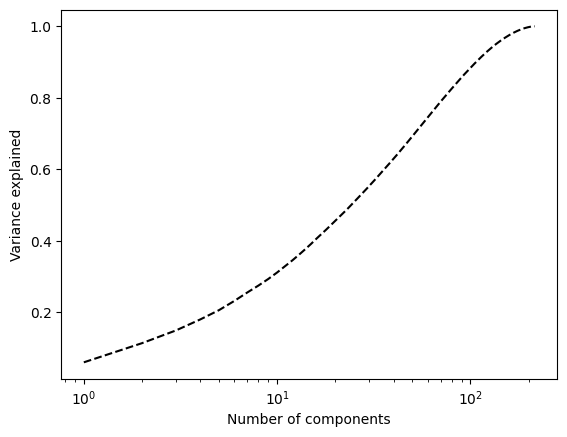

In [35]:
# Calculate the variance explained
variance_explained_layer1 = get_variance_explained(evals_layer1)

plot_variance_explained(variance_explained_layer1)

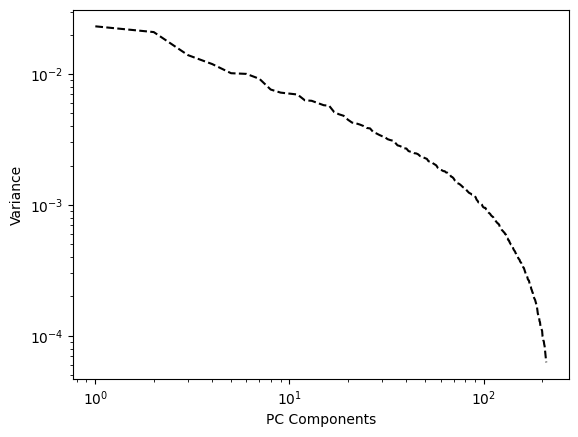

In [78]:
#Visualize without last 5 eigenvalues because they are significant outliers
plot_eigenspectrum(evals_layer1[:210])

## Layer 2/3 Analysis

In [38]:
data_layer2_3 = pd.read_csv("layer2_3.csv", header= None)
data_layer2_3 = data_layer2_3.to_numpy()
data_layer2_3 = np.transpose(data_layer2_3)
np.shape(data_layer2_3)

(378, 4117)

In [39]:
evectors_layer2_3, evals_layer2_3 = pca(data_layer2_3)

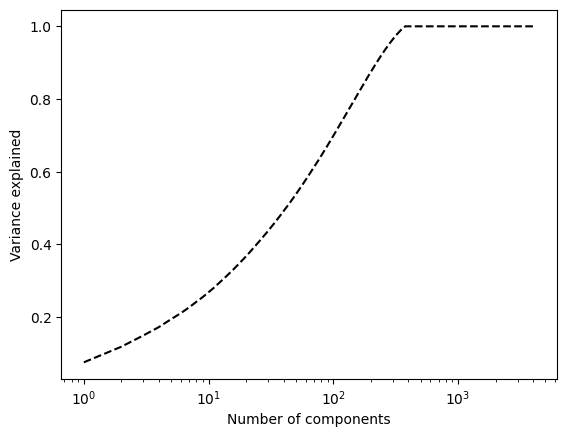

In [40]:
variance_explained_layer2_3 = get_variance_explained(evals_layer2_3)

plot_variance_explained(variance_explained_layer2_3)

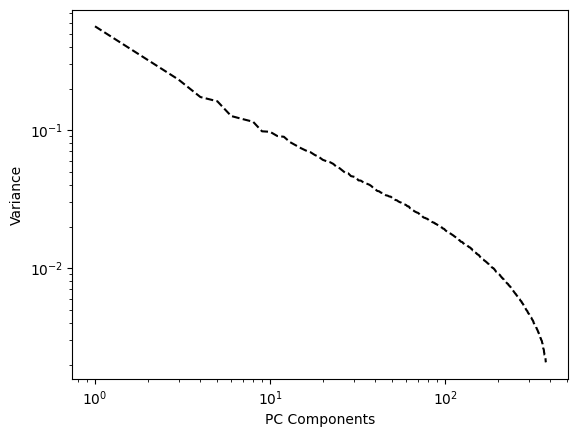

In [72]:
plot_eigenspectrum(evals_layer2_3[:377])

## Layer 4 Analysis

In [42]:
data_layer4 = pd.read_csv("layer4.csv", header= None)
data_layer4 = data_layer4.to_numpy()
data_layer4 = np.transpose(data_layer4)
np.shape(data_layer4)

(378, 1339)

In [43]:
evectors_layer4, evals_layer4 = pca(data_layer4)

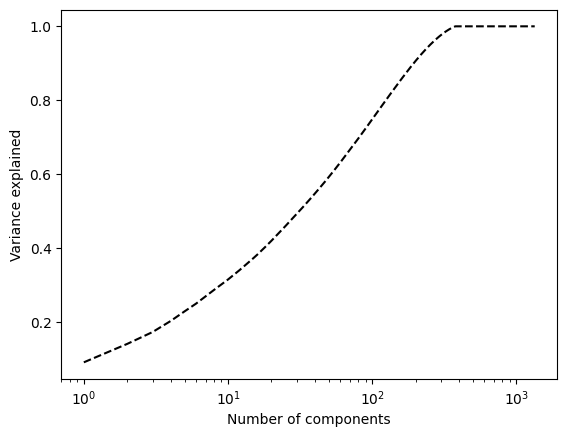

In [44]:
variance_explained_layer4 = get_variance_explained(evals_layer4)

plot_variance_explained(variance_explained_layer4)

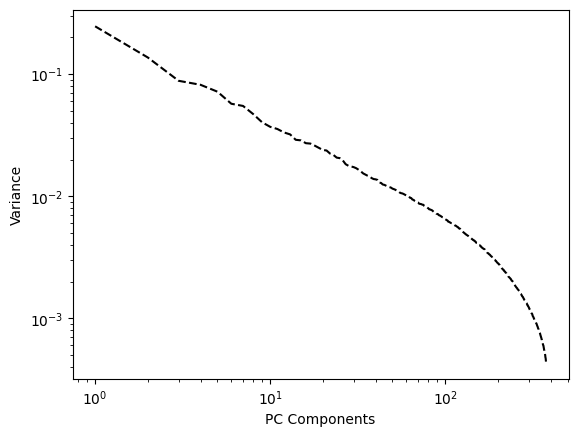

In [74]:
plot_eigenspectrum(evals_layer4[:377])

## Layer 5 Analysis

In [46]:
data_layer5 = pd.read_csv("layer5.csv", header= None)
data_layer5 = data_layer5.to_numpy()
data_layer5 = np.transpose(data_layer5)
np.shape(data_layer5)

(378, 2510)

In [47]:
evectors_layer5, evals_layer5 = pca(data_layer5)

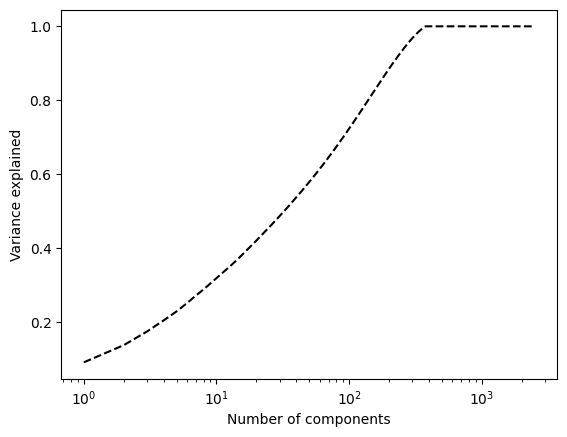

In [48]:
variance_explained_layer5 = get_variance_explained(evals_layer5)

plot_variance_explained(variance_explained_layer5)

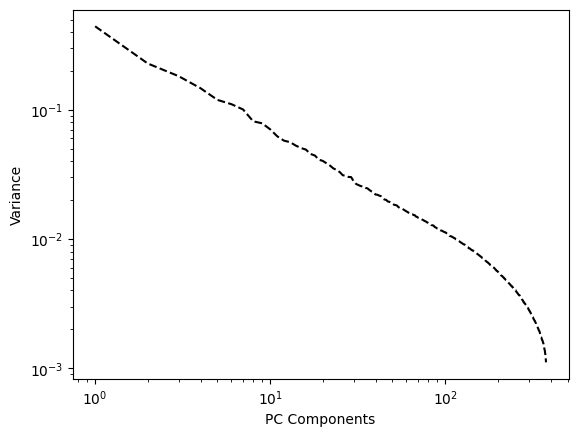

In [76]:
plot_eigenspectrum(evals_layer5[:377])

## Layer 6 Analysis

In [50]:
data_layer6 = pd.read_csv("layer6.csv", header= None)
data_layer6 = data_layer6.to_numpy()
data_layer6 = np.transpose(data_layer6)
np.shape(data_layer6)

(378, 61)

In [51]:
score_layer6, evectors_layer6, evals_layer6 = pca(data_layer6)

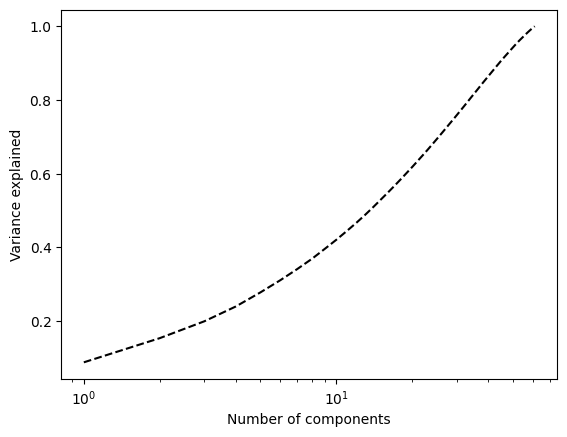

In [52]:
variance_explained_layer6 = get_variance_explained(evals_layer6)

plot_variance_explained(variance_explained_layer6)

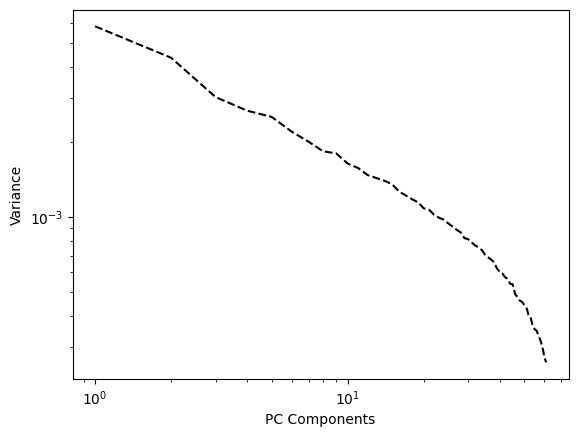

In [53]:
plot_eigenspectrum(evals_layer6)

## Combined Layer Visualization

In [55]:
variance_explained_1,variance_explained_23,variance_explained_4,variance_explained_5,variance_explained_6 = get_variance_explained_combined(evals_layer1,evals_layer2_3,evals_layer4,evals_layer5,evals_layer6)

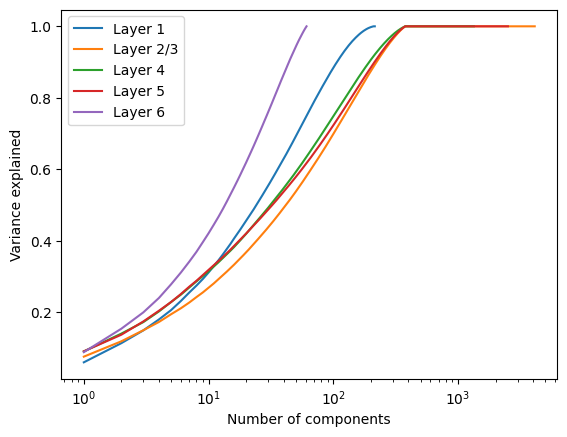

In [57]:
plot_variance_explained_combined(variance_explained_layer1,variance_explained_layer2_3,variance_explained_layer4,variance_explained_layer5,variance_explained_layer6)

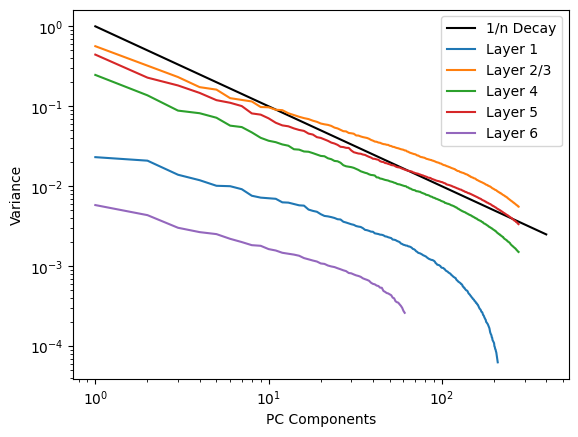

In [108]:
plot_eigenspectrum_combined(evals_layer1,evals_layer2_3,evals_layer4,evals_layer5,evals_layer6)